## Universidad de Buenos Aires
## Visión por Computadora I

### Alumno: Eduardo Echeverria

## Trabajo Práctico 1 - Parte 2

### 1. Para las imagenes: img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grises y visualizarlas

In [2]:
# Importamos las librerias necesarias
%matplotlib inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [3]:
# Utilizamos OpenCV para leer ambas imagenes en modo escala de grises
img_1 = cv.imread('./img1_tp.png', cv.IMREAD_GRAYSCALE)
img_2 = cv.imread('./img2_tp.png', cv.IMREAD_GRAYSCALE)

Text(0.5, 1.0, 'Imagen: img2_tp.png')

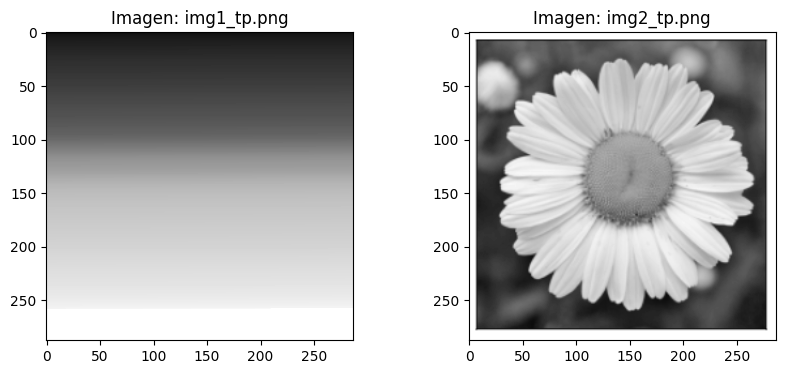

In [4]:
# Visualizamos ambas figuras
fig = plt.figure(figsize=(10, 4))

# Primera imagen
ax1 = plt.subplot(121)
ax1.imshow(img_1, cmap='gray', vmin=0, vmax=255)
ax1.set_title('Imagen: img1_tp.png')

# Segunda imagen
ax2 = plt.subplot(122)
ax2.imshow(img_2, cmap='gray', vmin=0, vmax=255)
ax2.set_title('Imagen: img2_tp.png')

### 2) Elija el numero de bins que crea conveniente y grafique el histograma, compare los histogramas entre si. Explicar lo que se observa...

Text(0.5, 1.0, 'Histograma: img1_tp.png')

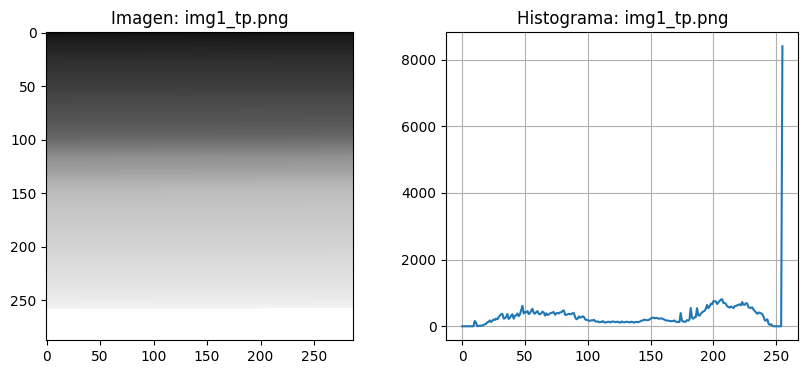

In [5]:
# Graficamos el histograma de la primera imagen
fig = plt.figure(figsize=(10, 4))

# Primera imagen
ax1 = plt.subplot(121)
ax1.imshow(img_1, cmap='gray', vmin=0, vmax=255)
ax1.set_title('Imagen: img1_tp.png')

hist1, bins1 = np.histogram(img_1.ravel(), 256, [0, 256])

# Segunda imagen
ax2 = plt.subplot(122)
ax2.plot(hist1)
ax2.grid()
ax2.set_title('Histograma: img1_tp.png')

Text(0.5, 1.0, 'Histograma: img2_tp.png')

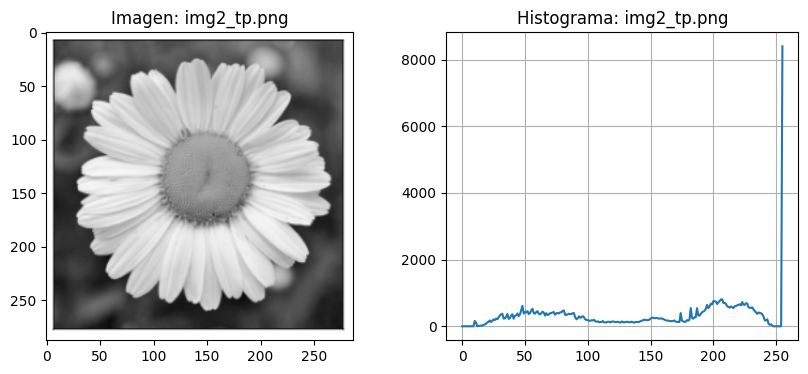

In [6]:
# Graficamos el histograma de la segunda imagen
fig = plt.figure(figsize=(10, 4))

# Primera imagen
ax1 = plt.subplot(121)
ax1.imshow(img_2, cmap='gray', vmin=0, vmax=255)
ax1.set_title('Imagen: img2_tp.png')

hist2, bins2 = np.histogram(img_2.ravel(), 256, [0, 256])

# Segunda imagen
ax2 = plt.subplot(122)
ax2.plot(hist2)
ax2.grid()
ax2.set_title('Histograma: img2_tp.png')

Text(0.5, 1.0, 'Histograma: img2_tp.png')

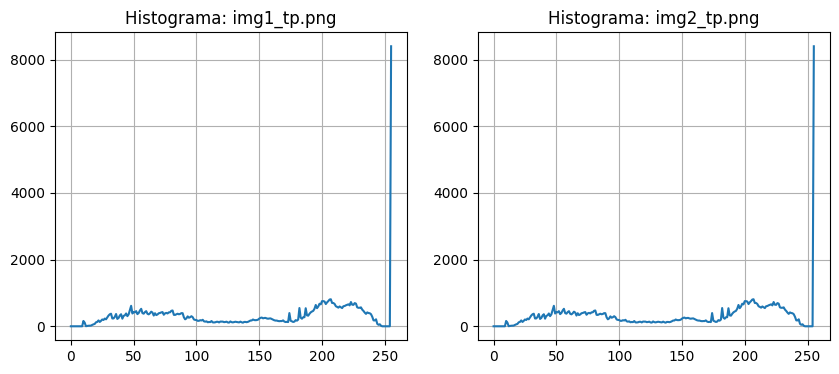

In [7]:
# Comparando ambos histogramas
fig = plt.figure(figsize=(10, 4))

# Primera imagen
hist1, bins1 = np.histogram(img_1.ravel(), 256, [0, 256])

ax_h = plt.subplot(121)
ax_h.plot(hist1)
ax_h.grid()
ax_h.set_title('Histograma: img1_tp.png')

# Segunda imagen
hist2, bins2 = np.histogram(img_2.ravel(), 256, [0, 256])

ax_h = plt.subplot(122)
ax_h.plot(hist2)
ax_h.grid()
ax_h.set_title('Histograma: img2_tp.png')

En primer lugar, se observa en el Eje X de los histogramas los tonos de cada píxel, expresados en un valor entre 0 (correspondiente al tono más obscuro) y 255 (correspondiente al tono más claro). Realizando la comparación entre los histogramas para las imágenes "img1_tp.png" y "img2_tp.png" se observa que la distribución de los tonos en ambas imagenes es prácticamente la misma (descartando algunas posibles diferencias imperceptibles).

Esto indica que ambas imagenes presentan la misma distribucion de tonos dentro de la escala de grises, con la única diferencia que la primera imagen tiene los píxeles agrupados de acuerdo a su valor, mientras que la segunda imagen tiene estos píxeles distribuidos formando una imagen concreta.

En caso de desear entrenar un modelo de clasificación o detección de imágenes, es necesario tomar en cuenta que no es posible representar las ubicaciones de los pixeles (o las relaciones espaciales entre pixeles) en un histograma; es decir que dos imágenes completamente diferentes que tengan distribuciones similares de colores o de tonos en una escala de grises, producirian histogramas igualmente similares, tanto que no serian utiles para clasificar las imagenes o para detectar alguna caracteristica particular en la imagen. 

Esto se puede observar en el ejemplo anterior donde la imagen de una escala de grises (img1_tp.png) tiene la misma distribución de tonos de pixeles que la imagen de la flor (img2_tp.png), en consecuencia ambas tienen el mismo histograma. En conclusion, no tendría utilidad alguna tomar los histogramas como features para entrenar un modelo de clasificación.


Los histogramas resultan ser mucho mas útiles en tareas de segmentación, es decir para separar pixeles por colores o por tonos en caso de imágenes en escala de grises.



### 3. Para la imagen "segmentacion.png" analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando máscaras, las regiones en imagenes separadas.

In [8]:
# Importamos las librerias requeridas
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

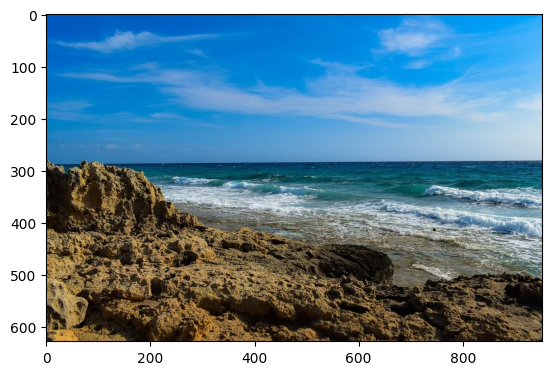

In [9]:
# Cargamos la imagen

playa_original = cv.imread('segmentacion.png')
playa_rgb = cv.cvtColor(playa_original, cv.COLOR_BGR2RGB)

plt.figure()
plt.imshow(playa_rgb)
plt.show()


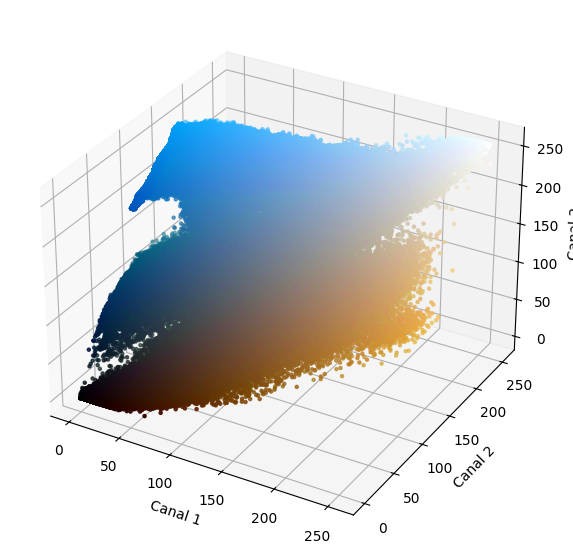

In [10]:
# Analizamos el histograma 3D en RGB para confirmar que los canales no tienen una distribucion normal

c1, c2, c3 = cv.split(playa_rgb)

fig_hist_rgb = plt.figure(figsize=(7, 7))
axis_rgb = fig_hist_rgb.add_subplot(1, 1, 1, projection="3d")

pixel_colors = playa_rgb.reshape((np.shape(playa_rgb)[0]*np.shape(playa_rgb)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis_rgb.scatter(c1.flatten(), c2.flatten(), c3.flatten(), facecolors=pixel_colors, marker=".")
axis_rgb.set_xlabel("Canal 1")
axis_rgb.set_ylabel("Canal 2")
axis_rgb.set_zlabel("Canal 3")
plt.show()

Obsevando el histograma de la distribución de los canales RGB, se puede observar que no se trata de una distribución Gaussiana, por lo que realizar una segmentación en RGB no resulta lo mas adecuado.

Se procede entonces a obtener el histograma de la distribución HSV:

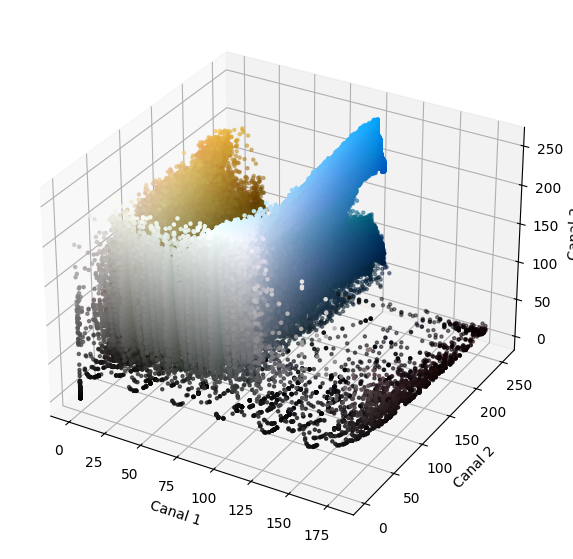

In [11]:
# Analizamos el histograma 3D en HSV para obtener una mejor separacion de los tonos
playa_HSV = cv.cvtColor(playa_original, cv.COLOR_BGR2HSV)
c1, c2, c3 = cv.split(playa_HSV)

fig_hist_hsv = plt.figure(figsize=(7, 7))
axis_hsv = fig_hist_hsv.add_subplot(1, 1, 1, projection="3d")

pixel_colors = playa_rgb.reshape((np.shape(playa_rgb)[0]*np.shape(playa_rgb)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis_hsv.scatter(c1.flatten(), c2.flatten(), c3.flatten(), facecolors=pixel_colors, marker=".")
axis_hsv.set_xlabel("Canal 1")
axis_hsv.set_ylabel("Canal 2")
axis_hsv.set_zlabel("Canal 3")
plt.show()

En este caso, se observa que, si bien la distribución tampoco corresponde a una Gaussiana, es mas fácil realizar la segmentacion en el histograma HSV. Por tanto, se procede a tomar muestras para cada sección de la imagen en base al Histograma HSV:

(-0.5, 952.5, 627.5, -0.5)

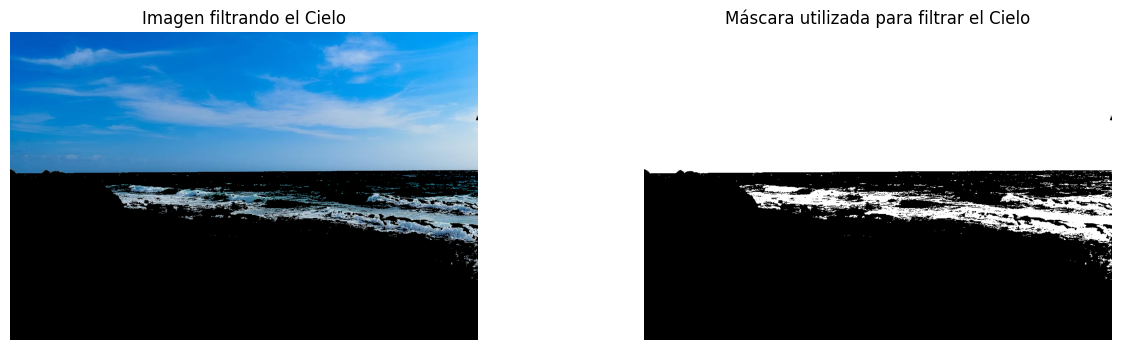

In [12]:
# Tomamos una muestra del histograma correspondiente al cielo

cielo_lower = (90, 30, 130)
cielo_upper = (110, 255, 255)

cielo_mask = cv.inRange(playa_HSV, cielo_lower,  cielo_upper)
cielo_filtered = cv.bitwise_and(playa_rgb, playa_rgb, mask=cielo_mask)

cielo_fig, cielo_ax = plt.subplots(1, 2, figsize=(15, 4))

plt.subplot(1, 2, 1) 
plt.imshow(cielo_filtered)
plt.title(f"Imagen filtrando el Cielo")
plt.axis("off")

plt.subplot(1, 2, 2) 
plt.imshow(cielo_mask,cmap='gray')
plt.title(f"Máscara utilizada para filtrar el Cielo")
plt.axis("off")

Se observa que las porciones del histograma correspondientes al blanco de las nubes del cielo, coinciden tambien con el blanco de ciertas regiones de la espuma del mar, lo cual ocasiona que el filtro aplicado para el cielo también encuentre coincidencias con la sección de la imágen correspondiente al mar.

(-0.5, 952.5, 627.5, -0.5)

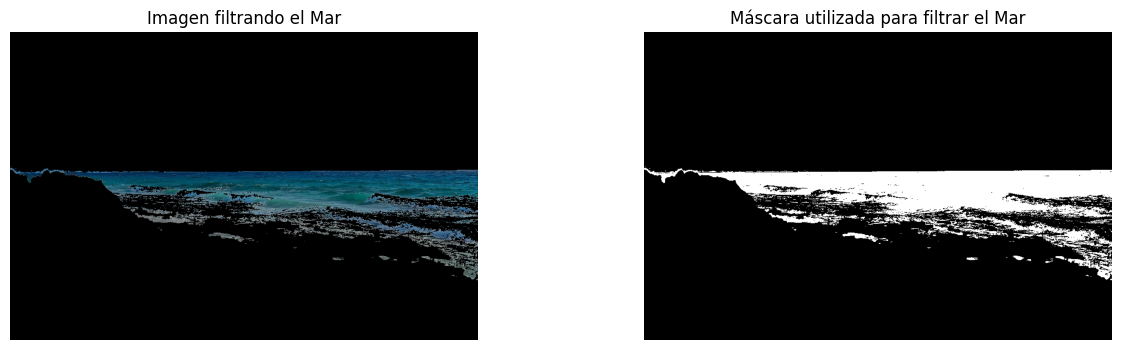

In [13]:
# Tomamos una muestra del histograma correspondiente al mar

mar_lower = (75, 10, 40)
mar_upper = (115, 255, 170)

mar_mask = cv.inRange(playa_HSV, mar_lower,  mar_upper)
mar_filtered = cv.bitwise_and(playa_rgb, playa_rgb, mask=mar_mask)

mar_fig, mar_ax = plt.subplots(1, 2, figsize=(15, 4))

plt.subplot(1, 2, 1) 
plt.imshow(mar_filtered)
plt.title(f"Imagen filtrando el Mar")
plt.axis("off")

plt.subplot(1, 2, 2) 
plt.imshow(mar_mask,cmap='gray')
plt.title(f"Máscara utilizada para filtrar el Mar")
plt.axis("off")

(-0.5, 952.5, 627.5, -0.5)

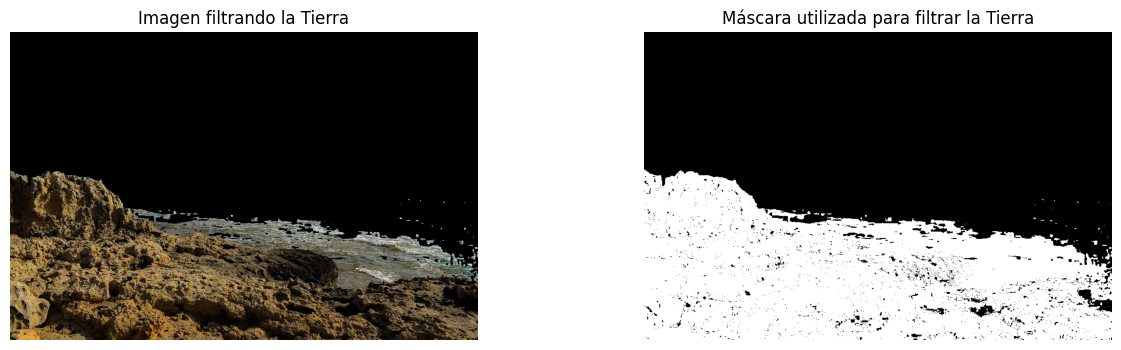

In [14]:
# Tomamos una muestra del histograma correspondiente la Tierra

tierra_lower = (5, 5, 5)
tierra_upper = (85, 255, 255)

tierra_mask = cv.inRange(playa_HSV, tierra_lower,  tierra_upper)
tierra_filtered = cv.bitwise_and(playa_rgb, playa_rgb, mask=tierra_mask)

tierra_fig, tierra_ax = plt.subplots(1, 2, figsize=(15, 4))

plt.subplot(1, 2, 1) 
plt.imshow(tierra_filtered)
plt.title(f"Imagen filtrando la Tierra")
plt.axis("off")

plt.subplot(1, 2, 2) 
plt.imshow(tierra_mask,cmap='gray')
plt.title(f"Máscara utilizada para filtrar la Tierra")
plt.axis("off")

Una de las técnicas para poder realizar el filtrado de imágenes consiste en obtener de forma arbitraria una sección de la imagen que contiene las caracteristicas que se desean filtrar.

Debido a que en la imágen de este experimiento, existen tonalidades que se encuentran dispersas en las tres secciones que se desean identificar (cielo, mar y tierra) y en muchos casos de forma coincidente, es difícil poder realizar un filtrado eficiente tomando como referencia secciones de cada una de las zonas a identificar. Si tomo una sección de la playa, voy a encontrar que muchas de las tonalidades de la arena se repiten en el mar, de igual forma, si tomo una sección del cielo se van a encontrar los mismos tonos de azul y celeste en el agua del mar, lo mismo para el caso de las nubes y la espuma del mar.

En lugar de esto, la solucion implementada toma valores del histograma en 3D correspondientes a las zonas a identificar, esto porque en el histograma es mucho mas facil poder separar de forma eficiente las tonalidades correspondientes a cada zona. De todas formas, los valores de los limites superiores e inferiores considerados en le histograma son tambien definidos de forma arbitraria.